**BART ridership Seasonality**

- Pull total ridership by week for 2016 and 2017
- Linear Graph depicting YOY:
    - Highlight most significant peaks and valleys and find significant events/holidays associated with them
- DF showing month over month / week over week builds
- Hypothesis: Highest peak for 2016 and 2017 would have been Superbowl week (Superbowl in SF February 7th). This would be considered an outlier.

**Observed trends on seasonality:**
- Big spike during superbowl week confirmed
- Largest drop in ridership happens during Thanksgiving week: 28% drop week over week
- Drops during major holidays: President's Day, Memorial Day, 4th of July, Labor day
- Big spike at the end of June with Pride Parade in SF

In [291]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly as py

In [3]:
#Read csv files - year 2015
csv_2015 = pd.read_csv("http://64.111.127.166/origin-destination/date-hour-soo-dest-2015.csv.gz", names=['Date', 'time', 'Origin', 'Destination', 'Throughput',])
csv_2015.head()

,Date,time,Origin,Destination,Throughput
0,2015-01-01,0,12TH,12TH,1
1,2015-01-01,0,12TH,16TH,1
2,2015-01-01,0,12TH,24TH,3
3,2015-01-01,0,12TH,ASHB,6
4,2015-01-01,0,12TH,BALB,3


In [21]:
#Read csv files - year 2016
csv_2016 = pd.read_csv("http://64.111.127.166/origin-destination/date-hour-soo-dest-2016.csv.gz", names=['Date', 'time', 'Origin', 'Destination', 'Throughput',])
csv_2016.head()

,Date,time,Origin,Destination,Throughput
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [5]:
#Read csv files - year 2017
csv_2017 = pd.read_csv("http://64.111.127.166/origin-destination/date-hour-soo-dest-2017.csv.gz", names=['Date', 'time', 'Origin', 'Destination', 'Throughput',])
csv_2017.head()

,Date,time,Origin,Destination,Throughput
0,2017-01-01,0,12TH,19TH,1
1,2017-01-01,0,12TH,24TH,2
2,2017-01-01,0,12TH,BAYF,1
3,2017-01-01,0,12TH,CIVC,5
4,2017-01-01,0,12TH,COLS,2


In [6]:
#Read number of rows for 2017 file
pd.DatetimeIndex(csv_2017['Date']).year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=3313625)

In [39]:
#Create df for 2017 weekly throughput
Weekly_Thru_2017 = pd.DataFrame(csv_2017.groupby(pd.DatetimeIndex(csv_2017['Date']).week)['Throughput'].sum())
Weekly_Thru_2017.reset_index(inplace=True)
Weekly_Thru_2017.columns=["Week", "Throughput"]
Weekly_Thru_2017['Year'] = "2017"
# Weekly_Thru_2017.head()

In [289]:
#Create df for 2016 weekly throughput
Weekly_Thru_2016 = pd.DataFrame(csv_2016.groupby(pd.DatetimeIndex(csv_2016['Date']).week)['Throughput'].sum())
Weekly_Thru_2016.reset_index(inplace=True)
Weekly_Thru_2016.columns=["Week", "Throughput"]
Weekly_Thru_2016['Year'] = "2016"
Weekly_Thru_2016.head()

,Week,Throughput,Year
0,1,2302815,2016
1,2,2394815,2016
2,3,2263860,2016
3,4,2701209,2016
4,5,2972383,2016


In [10]:
#Create df for 2015 weekly throughput
Weekly_Thru_2015 = pd.DataFrame(csv_2015.groupby(pd.DatetimeIndex(csv_2015['Date']).week)['Throughput'].sum())
Weekly_Thru_2015.reset_index(inplace=True)
Weekly_Thru_2015.columns=["Week", "Throughput"]
Weekly_Thru_2015['Year'] = "2015"
Weekly_Thru_2015.head()

,Week,Throughput,Year
0,1,696297,2015
1,2,2341257,2015
2,3,2329949,2015
3,4,2275857,2015
4,5,2450734,2015


In [94]:
#Create Month key
month_name = pd.DataFrame({"Month": [1,2,3,4,5,6,7,8,9,10,11,12], "Name":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]})
month_name

,Month,Name
0,1,Jan
1,2,Feb
2,3,Mar
3,4,Apr
4,5,May
5,6,Jun
6,7,Jul
7,8,Aug
8,9,Sep
9,10,Oct


In [105]:
#Note how many months are available in the 2017 file
Monthly_Thru_2017 = pd.DataFrame(csv_2017.groupby(pd.DatetimeIndex(csv_2017['Date']).month)['Throughput'].sum())
Monthly_Thru_2017.reset_index(inplace=True)
Monthly_Thru_2017.columns=["Month", "Throughput"]
Monthly_Thru_2017 = pd.merge(Monthly_Thru_2017, month_name, on=["Month"])
Monthly_Thru_2017

,Month,Throughput,Name
0,1,9900438,Jan
1,2,9506289,Feb
2,3,10944026,Mar
3,4,9903187,Apr
4,5,1287055,May


In [106]:
#Create df for 2016 weekly throughput
Monthly_Thru_2016 = pd.DataFrame(csv_2016.groupby(pd.DatetimeIndex(csv_2016['Date']).month)['Throughput'].sum())
Monthly_Thru_2016.reset_index(inplace=True)
Monthly_Thru_2016.columns=["Month", "Throughput"]
Monthly_Thru_2016 = pd.merge(Monthly_Thru_2016, month_name, on=["Month"])
Monthly_Thru_2016

,Month,Throughput,Name
0,1,10078387,Jan
1,2,10842145,Feb
2,3,11184982,Mar
3,4,10692900,Apr
4,5,10827558,May
5,6,11137928,Jun
6,7,10375579,Jul
7,8,11210330,Aug
8,9,10754119,Sep
9,10,10952882,Oct


In [117]:
#Create df for 2015 weekly throughput
Monthly_Thru_2015 = pd.DataFrame(csv_2015.groupby(pd.DatetimeIndex(csv_2015['Date']).month)['Throughput'].sum())
Monthly_Thru_2015.reset_index(inplace=True)
Monthly_Thru_2015.columns=["Month", "Throughput"]
Monthly_Thru_2015 = pd.merge(Monthly_Thru_2015, month_name, on=["Month"])
Monthly_Thru_2015

,Month,Throughput,Name
0,1,9968193,Jan
1,2,9585065,Feb
2,3,10963403,Mar
3,4,10889565,Apr
4,5,10433766,May
5,6,11225954,Jun
6,7,11124649,Jul
7,8,10763934,Aug
8,9,10873013,Sep
9,10,11533152,Oct


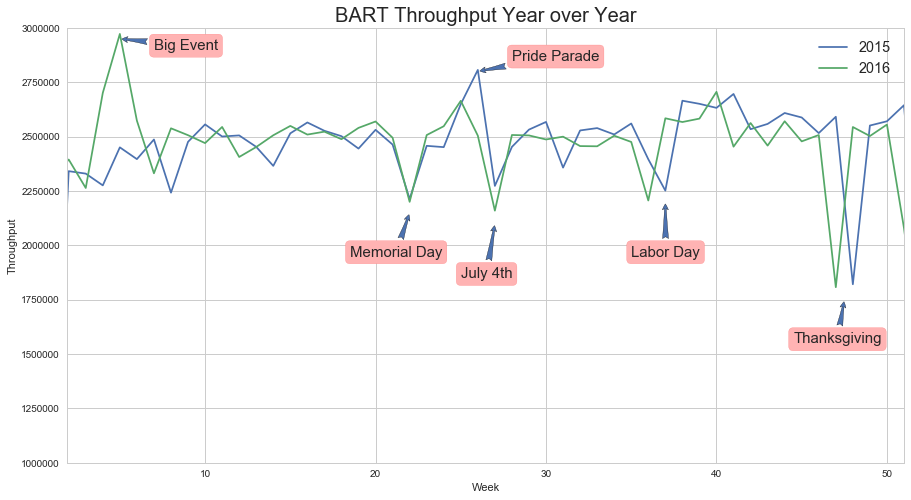

In [288]:
#Plot line char for weekly throughout, years 2015 and 2016
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
plt.plot(Weekly_Thru_2015["Week"], Weekly_Thru_2015["Throughput"], label="2015")
plt.plot(Weekly_Thru_2016["Week"], Weekly_Thru_2016["Throughput"], label="2016")
# plt.plot(Weekly_Thru_2017["Week"], Weekly_Thru_2017["Throughput"], label="2017")
plt.ylabel("Throughput")
plt.xlabel("Week")
plt.ylim(1000000, 3000000)
plt.xlim(1.9,51)
plt.title("BART Throughput Year over Year", size=20)
plt.annotate("Thanksgiving", xy=(47.5,1750000), 
             xytext=(44.5,1550000), 
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7),ec=(1., .5, .5)), 
             arrowprops=dict(arrowstyle="fancy"), 
             size=15)
plt.annotate("Memorial Day", xy=(22,2150000), 
             xytext=(18.5, 1950000), 
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7),ec=(1., .5, .5)),
             arrowprops=dict(arrowstyle="fancy"), 
             size=15)
plt.annotate("July 4th", 
             xy=(27,2100000), 
             xytext=(25, 1850000), 
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7),ec=(1., .5, .5)),
             arrowprops=dict(arrowstyle="fancy"), 
             size=15)
plt.annotate("Labor Day", 
             xy=(37,2200000), 
             xytext=(35, 1950000), 
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7),ec=(1., .5, .5)),
             arrowprops=dict(arrowstyle="fancy"), 
             size=15)
plt.annotate("Pride Parade", 
             xy=(26,2800000), 
             xytext=(28, 2850000), 
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7),ec=(1., .5, .5)),
             arrowprops=dict(arrowstyle="fancy"), 
             size=15)
plt.annotate("Big Event", 
             xy=(5,2950000), 
             xytext=(7, 2900000), 
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7),ec=(1., .5, .5)),
             arrowprops=dict(arrowstyle="fancy"), 
             size=15)
plt.xticks()
plt.legend(fontsize="large")
plt.show()

#List of dates by week for 2016
https://www.epochconverter.com/weeks/2016

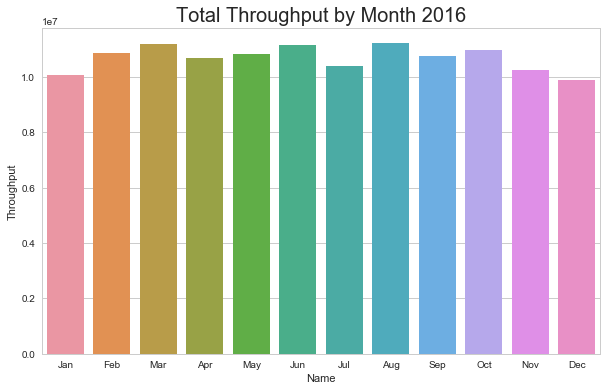

In [295]:
#Throughput by month
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.barplot(x='Name', y='Throughput', data=Monthly_Thru_2016)
# sns.barplot(x='Name', y='Throughput', data=Monthly_Thru_2015)
plt.title("Total Throughput by Month 2016", size=20)
plt.show()

In [110]:
# Create df for hourly throughput trends
Hourly_Thru_2016 = pd.DataFrame(csv_2016.groupby(['time'])['Throughput'].sum())
Hourly_Thru_2016.reset_index(inplace=True)
Hourly_Thru_2016.columns=["Hour", "Throughput"]
Hourly_Thru_2016.head()

,Hour,Throughput
0,0,1218224
1,1,212302
2,2,11162
3,3,5527
4,4,177250


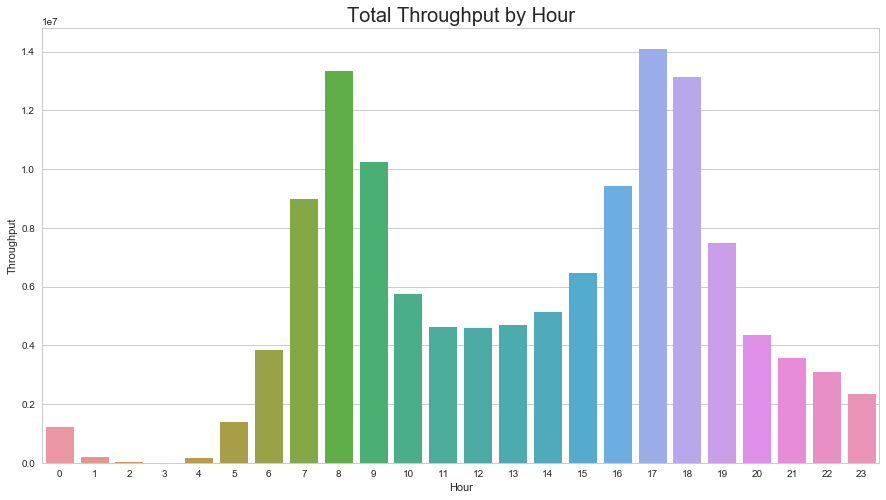

In [111]:
#Throughput by hour
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.barplot(x='Hour', y='Throughput', data=Hourly_Thru_2016)
plt.title("Total Throughput by Hour", size=20)
plt.show()